# Titanic dataset

Usando a base de dados Titanic, será feito o tratamento dos dados e o treinamento de um modelo para previsão.

Importando bibliotecas:

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns

Lê-se os dados:

In [192]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

## Análise exploratória

Primeira análise, obtendo o formato e conteúdo dos dados.

In [193]:
df.shape

(891, 12)

In [194]:
df_test.shape

(418, 11)

In [195]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [196]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Em uma primeira análise, é muito pouco provável que a variável 'Name' influencie na previsão. Assim, esta será removida.

In [197]:
df = df.drop(['Name'],axis=1)
df_test = df_test.drop(['Name'],axis=1)

### Dados faltantes

Agora são analisadas as colunas que contêm dados faltantes.

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [199]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


Percebe-se que a variável 'Cabin' possui muitas posições faltantes. Em segundo lugar, a variável 'Age'. Por fim, a variável 'Embarked' possui apenas duas entradas faltantes. Nos dados de teste, a coluna 'Fare' tem uma linha faltante. A seguir estas colunas serão analisadas individualmente.

#### Cabin

A variável Cabin é uma variável categórica, que contém informações sobre qual cabine o passageiro estava. Abaixo são obtidas todos os números de cabines, seguido do número de categorias.

In [200]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [201]:
df['Cabin'].unique().size

148

Percebe-se que são 147 cabines diferentes (148 menos a categoria 'nan') para 204 passageiros que contém esta informação. Pode ser que o número da cabine não seja muito discriminativo, pois existe uma cabine para menos de dois passageiros. 

Uma premissa que se pode ter é que os passageiros que não possuem esta informação não estavam em cabine alguma. Logo, uma opção de transformação é colocar todos os que têm estes dados faltantes em uma posição de "sem cabine" e o restante em uma mesma categoria "com cabine".

Abaixo, plota-se a distribuição das pessoas que sobreviveram de acordo com o fato delas terem uma cabine ou não.

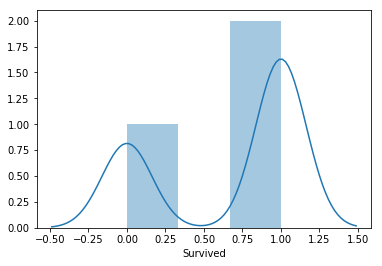

In [202]:
sns.distplot(df['Survived'][df['Cabin'].notnull()])

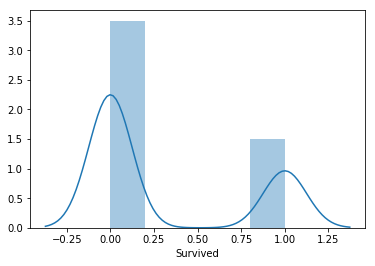

In [203]:
sns.distplot(df['Survived'][df['Cabin'].isna()])

Percebe-se que há uma boa distinção entre as distribuições dos passageiros que têm e que não têm a informação da cabine.

Outra opção é manter as categorias, criando uma nova categoria "sem cabine". Isto faz sentido pois, intuitivamente, pessoas de uma mesma cabine sobrevivem ou não juntas. Porém, esta opção é onerosa, pois, ao se pré-processar os dados, podem ser criadas 148 novas colunas. Esta opção será deixada de lado por enquanto.

Transforma-se os dados de acordo com a primeira opção:

In [204]:
df.loc[df['Cabin'].notnull(),'HasCabin'] = 1
df.loc[df['Cabin'].isna(),'HasCabin'] = 0
df = df.drop('Cabin',axis=1)

df_test.loc[df_test['Cabin'].notnull(),'HasCabin'] = 1
df_test.loc[df_test['Cabin'].isna(),'HasCabin'] = 0
df_test = df_test.drop('Cabin',axis=1)

In [205]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,1.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0
3,4,1,1,female,35.0,1,0,113803,53.1000,S,1.0
4,5,0,3,male,35.0,0,0,373450,8.0500,S,0.0
5,6,0,3,male,NaN,0,0,330877,8.4583,Q,0.0
6,7,0,1,male,54.0,0,0,17463,51.8625,S,1.0
7,8,0,3,male,2.0,3,1,349909,21.0750,S,0.0
8,9,1,3,female,27.0,0,2,347742,11.1333,S,0.0
9,10,1,2,female,14.0,1,0,237736,30.0708,C,0.0


#### Age

Uma opção óbvia para lidar com os valores faltantes de 'Age' é imputá-los como a média ou a mediana das idades. Analisa-se aqui os dois valores:

29.69911764705882
28.0


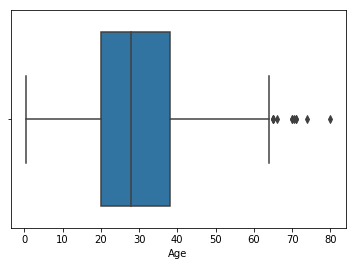

In [206]:
print(df.loc[df.Age.notnull(),'Age'].mean())
print(df.loc[df.Age.notnull(),'Age'].median())
sns.boxplot(df.loc[df.Age.notnull(),'Age'])

Percebe-se pelo boxplot que há alguns outliers nesta variável. Assim, será usada a mediana por ser menos influenciada por estes outliers.

In [207]:
df.loc[df.Age.isna(),'Age'] = df.loc[df.Age.notnull(),'Age'].median()
df_test.loc[df_test.Age.isna(),'Age'] = df_test.loc[df_test.Age.notnull(),'Age'].median()
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,1.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0
3,4,1,1,female,35.0,1,0,113803,53.1000,S,1.0
4,5,0,3,male,35.0,0,0,373450,8.0500,S,0.0
5,6,0,3,male,28.0,0,0,330877,8.4583,Q,0.0
6,7,0,1,male,54.0,0,0,17463,51.8625,S,1.0
7,8,0,3,male,2.0,3,1,349909,21.0750,S,0.0
8,9,1,3,female,27.0,0,2,347742,11.1333,S,0.0
9,10,1,2,female,14.0,1,0,237736,30.0708,C,0.0


#### Embarked

In [208]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Como esta é uma variável categórica com apenas dois valores faltantes, é seguro imputá-los com a variável que detém a maioria das instâncias.

In [209]:
df.loc[df.Embarked.isna(),'Embarked'] = 'S'
df_test.loc[df_test.Embarked.isna(),'Embarked'] = 'S'

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
HasCabin       891 non-null float64
dtypes: float64(3), int64(5), object(3)
memory usage: 76.6+ KB


#### Fare (test)

Mais uma vez, temos uma variável contínua. Usando o boxplot:

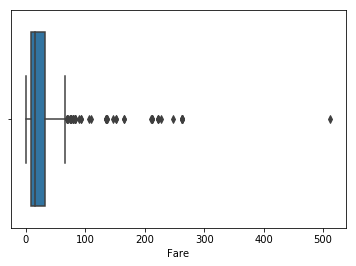

In [211]:
sns.boxplot(df_test.loc[df_test.Fare.notnull(),'Fare'])

Há muitos dados acima do máximo. Assim, será usada a mediana também.

In [212]:
df_test.loc[df_test.Fare.isna(),'Fare'] = df_test.loc[df_test.Fare.notnull(),'Fare'].median()

In [213]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
HasCabin       418 non-null float64
dtypes: float64(3), int64(4), object(3)
memory usage: 32.7+ KB


## Ticket

Analisando a variável Ticket para decidir seu destino.

In [214]:
print(df.Ticket.unique().size)
print(df.Ticket.unique())

681
['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' 'PC 17754' 'PC 17759' '231919' '244367' '349245'
 '349215' '3528

Há 681 números de tickets diferentes para 891 passageiros. Aparentemente não há um padrão muito claro que se segue destes códigos. Assim, esta coluna será deletada.

In [215]:
df = df.drop('Ticket',axis=1)
df_test = df_test.drop('Ticket',axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin
0,1,0,3,male,22.0,1,0,7.2500,S,0.0
1,2,1,1,female,38.0,1,0,71.2833,C,1.0
2,3,1,3,female,26.0,0,0,7.9250,S,0.0
3,4,1,1,female,35.0,1,0,53.1000,S,1.0
4,5,0,3,male,35.0,0,0,8.0500,S,0.0


## Sex

O gênero do passageiro será transformado em uma variável binária 'IsMale'.

In [216]:
df.loc[df['Sex']=='male','IsMale'] = 1
df.loc[df['Sex']=='female','IsMale'] = 0

df_test.loc[df_test['Sex']=='male','IsMale'] = 1
df_test.loc[df_test['Sex']=='female','IsMale'] = 0

In [217]:
df = df.drop('Sex',axis=1)
df_test = df_test.drop('Sex',axis=1)

df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,HasCabin,IsMale
0,1,0,3,22.0,1,0,7.2500,S,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,C,1.0,0.0
2,3,1,3,26.0,0,0,7.9250,S,0.0,0.0
3,4,1,1,35.0,1,0,53.1000,S,1.0,0.0
4,5,0,3,35.0,0,0,8.0500,S,0.0,1.0


In [218]:
df = df.join(pd.get_dummies(df.Embarked))
df_test = df_test.join(pd.get_dummies(df_test.Embarked))

In [219]:
df = df.drop('Embarked',axis=1)
df_test = df_test.drop('Embarked',axis=1)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
HasCabin       891 non-null float64
IsMale         891 non-null float64
C              891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
dtypes: float64(4), int64(5), uint8(3)
memory usage: 65.3 KB


## Pairplot

Agora que temos todas as variáveis numéricas, faz-se um pairplot das variáveis:

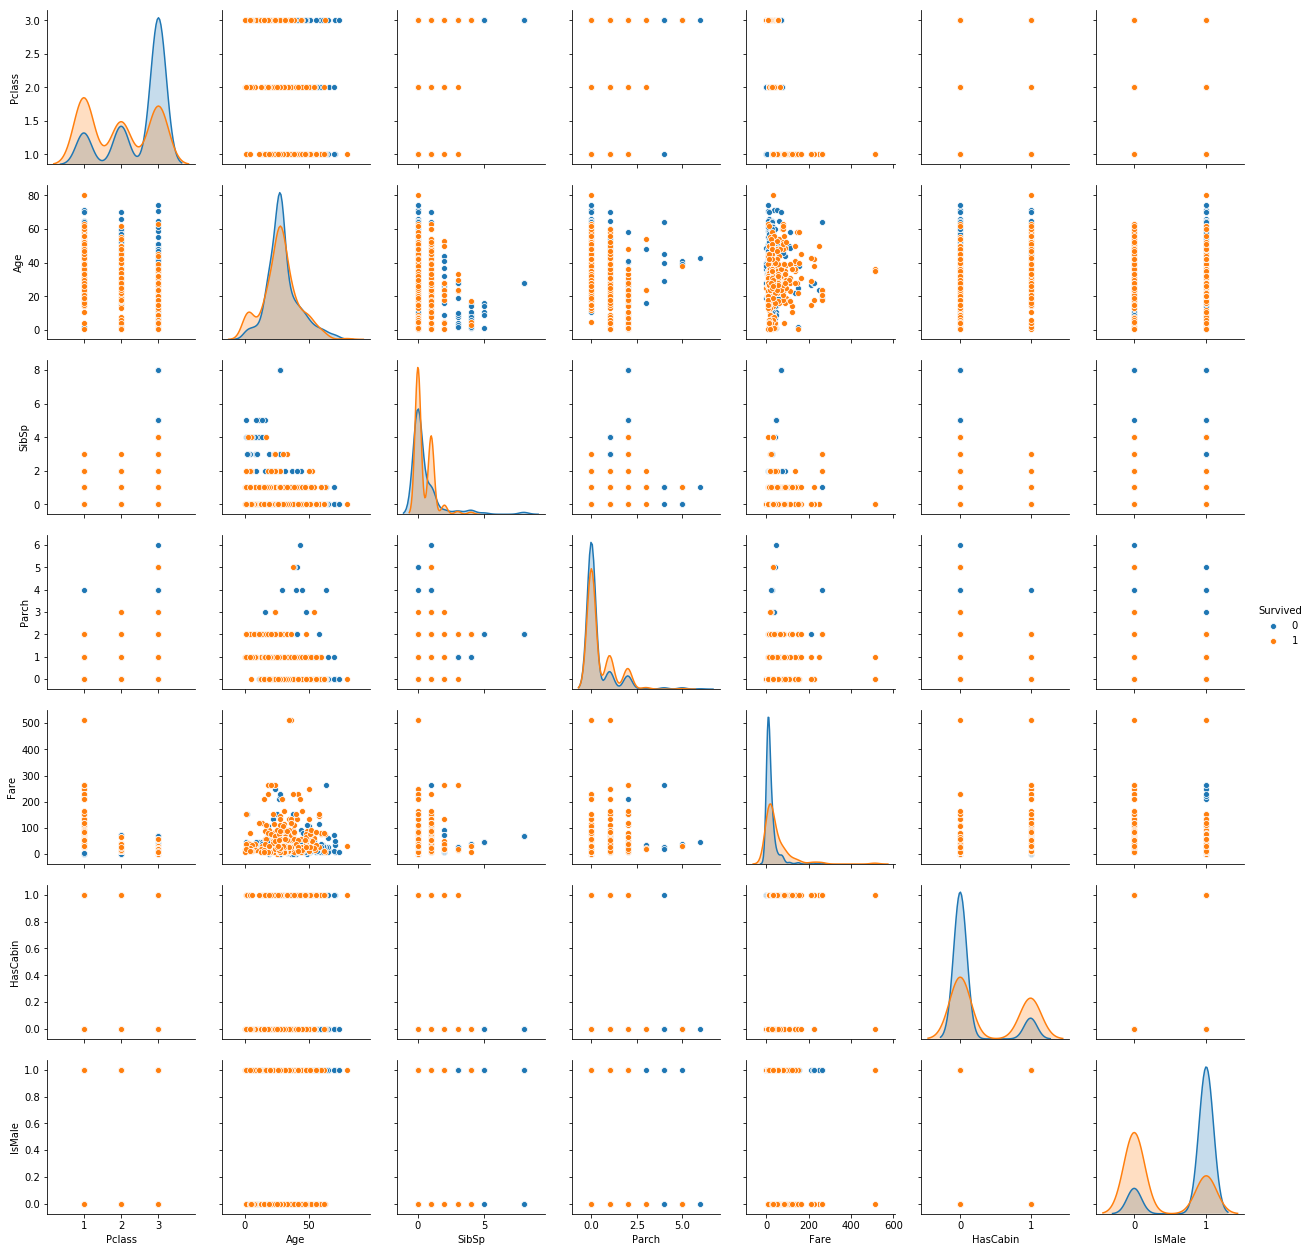

In [149]:
var_pairs = list(df.columns)
var_pairs.remove('Survived')
var_pairs.remove('PassengerId')
sns.pairplot(df,vars=var_pairs,hue='Survived',diag_kind='kde')

Aqui pode-se hipotetizar algumas coisas:

1. Na variável 'Pclass', a diferença entre as classes 1 e 2 é ínfima. Aparentemente, a diferença maior é da classe 3 para as demais.
1. Aparentemente, a variável 'Q' por si só discrimina pouquíssimo os sobreviventes. Porém, combinada com a variável 'Age' a classe é separada de certa forma. Assim, primeiramente esta variável pode ser mantida.
1. Primeiramente, pode-se pensar em juntar as variáveis 'SibSp' (número de irmãos e cônjuge) e 'Parch' (Número de pais e filhos), já que ambas contam o número de familiares a bordo. Porém, percebe-se de acordo com a estimação pelo KDE que o comportamento destas variáveis com relação aos sobreviventes é antagônico: passageiros sem pais ou filhos a bordo têm menos chances de sobreviver, enquanto passageiros com menos irmãos/cônjuge têm mais chances de sobreviver.
1. A variável 'Fare' tem comportamento exponencial, no qual a maioria esmagadora pagou relativamente pouco, enquanto o restante pagou muito. Como é uma variável contínua, pode ser feita uma transformação pela função Logaritmica.
1. O fato da taxa de sobrevivência ser tão mais alta para SibSp=1 do que para SibSp=2 é provavelmente pelo motivo de que, quando o passageiro tem um acompanhante, é um cônjuge, e não um irmão.

Olhando-se a correlação entre as variáveis:

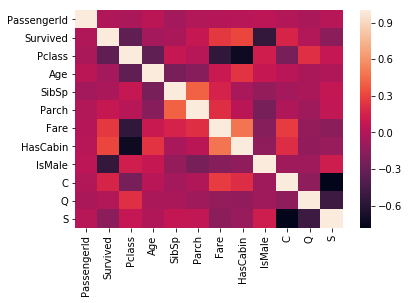

In [221]:
correlations = df.corr()
sns.heatmap(correlations)

Vemos, primeiramente, que a variável IsMale tem uma correlação negativa muito forte com a target. Um dos principais motivos pode ser simplesmente o alto número de homens no navio. Também pode ser pelo fato que, em situação de naufrágio, as mulheres são resgatadas primeiro

Em seguida, é gritante a correlação negativa entre HasCabin e Pclass, o que é óbvio: faz todo sentido os passageiros das primeiras classes possuirem cabines. Estas duas variáveis podem ser redundantes.

A correlação entre Parch e SibSp é alta, assim como entre HasCabin e Fare, que também faz muito sentido. No contexto das duas últimas, ainda se observa que a correlação entre Fare e Pclass é alta. Assim, estas três podem ser redundantes.

Por fim, a correlação entre as variáveis C e Q com S é muito negativa. Isto ocorre pois a quantidade de pessoas no portão S é bem maior, e é sempre 1 quando as demais são 0.

São propostas as seguintes alterações:

* Transformar a variável 'Pclass' em uma variável binária 'IsClassThree'.
* Transformar 'Fare' em seu logaritmo.
* Transformar 'Parch' em uma variável binária 'HasParents'.
* Transformar 'SibSp' em uma variável binária 'MoreThanOneComp', onde temos valor 1 caso o passageiro tenha mais de um acompanhante a bordo.

Transformando as variáveis:

In [222]:
df.loc[df.Pclass!=3,'IsClassThree'] = 0
df.loc[df.Pclass==3,'IsClassThree'] = 1
df_test.loc[df_test.Pclass!=3,'IsClassThree'] = 0
df_test.loc[df_test.Pclass==3,'IsClassThree'] = 1
df = df.drop('Pclass',axis=1)
df_test = df_test.drop('Pclass',axis=1)

df.Fare = np.log(df.Fare+1)
df_test.Fare = np.log(df_test.Fare+1)

df.loc[df.Parch>0,'HasParents'] = 1
df.loc[df.Parch==0,'HasParents'] = 0
df_test.loc[df_test.Parch>0,'HasParents'] = 1
df_test.loc[df_test.Parch==0,'HasParents'] = 0
df = df.drop('Parch',axis=1)
df_test = df_test.drop('Parch',axis=1)

df.loc[df.SibSp<=1,'MoreThanOneComp'] = 0
df.loc[df.SibSp>1,'MoreThanOneComp'] = 1
df_test.loc[df_test.SibSp<=1,'MoreThanOneComp'] = 0
df_test.loc[df_test.SibSp>1,'MoreThanOneComp'] = 1
df = df.drop('SibSp',axis=1)
df_test = df_test.drop('SibSp',axis=1)

In [223]:
df.describe()

,PassengerId,Survived,Age,Fare,HasCabin,IsMale,C,Q,S,IsClassThree,HasParents,MoreThanOneComp
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.361582,2.962246,0.228956,0.647587,0.188552,0.086420,0.725028,0.551066,0.239057,0.083053
std,257.353842,0.486592,13.019697,0.969048,0.420397,0.477990,0.391372,0.281141,0.446751,0.497665,0.426747,0.276117
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,22.000000,2.187218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,28.000000,2.737881,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,668.500000,1.000000,35.000000,3.465736,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,891.000000,1.000000,80.000000,6.240917,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Normalização

Para a SVM, normaliza-se os dados para média 0 e desvio-padrão 1:

In [224]:
cols = df.columns[2:]
means = []
sds = []
for col in cols:
    df2 = pd.concat([df[col],df_test[col]])
    this_mean = df2.mean()
    this_sd = df2.std()
    df[col] = (df[col] - this_mean)/this_sd
    means.append(this_mean)
    sds.append(this_sd)

df.head(10)

,PassengerId,Survived,Age,Fare,HasCabin,IsMale,C,Q,S,IsClassThree,HasParents,MoreThanOneComp
0,1,0,-0.575867,-0.897443,-0.539170,0.743213,-0.509575,-0.321917,0.654761,0.919574,-0.553311,-0.285929
1,2,1,0.662976,1.343942,1.853284,-1.344482,1.960920,-0.321917,-1.526109,-1.086630,-0.553311,-0.285929
2,3,1,-0.266157,-0.816227,-0.539170,-1.344482,-0.509575,-0.321917,0.654761,0.919574,-0.553311,-0.285929
3,4,1,0.430693,1.044703,1.853284,-1.344482,-0.509575,-0.321917,0.654761,-1.086630,-0.553311,-0.285929
4,5,0,0.430693,-0.801864,-0.539170,0.743213,-0.509575,-0.321917,0.654761,0.919574,-0.553311,-0.285929
5,6,0,-0.111301,-0.756292,-0.539170,0.743213,-0.509575,3.104015,-1.526109,0.919574,-0.553311,-0.285929
6,7,0,1.901819,1.020806,1.853284,0.743213,-0.509575,-0.321917,0.654761,-1.086630,-0.553311,-0.285929
7,8,0,-2.124421,0.118989,-0.539170,0.743213,-0.509575,-0.321917,0.654761,0.919574,1.805921,3.494694
8,9,1,-0.188729,-0.499083,-0.539170,-1.344482,-0.509575,-0.321917,0.654761,0.919574,1.805921,-0.285929
9,10,1,-1.195289,0.471995,-0.539170,-1.344482,1.960920,-0.321917,-1.526109,-1.086630,-0.553311,-0.285929


In [225]:
# Tem que ser normalizados pelos mesmos valores de média de desvio padrão

for i in range(len(cols)):
    df_test[cols[i]] = (df_test[cols[i]] - means[i])/sds[i]
    
df_test.head(10)

,PassengerId,Age,Fare,HasCabin,IsMale,C,Q,S,IsClassThree,HasParents,MoreThanOneComp
0,892,0.391979,-0.827372,-0.53917,0.743213,-0.509575,3.104015,-1.526109,0.919574,-0.553311,-0.285929
1,893,1.359825,-0.929221,-0.53917,-1.344482,-0.509575,-0.321917,0.654761,0.919574,-0.553311,-0.285929
2,894,2.521240,-0.630113,-0.53917,0.743213,-0.509575,3.104015,-1.526109,-1.086630,-0.553311,-0.285929
3,895,-0.188729,-0.734233,-0.53917,0.743213,-0.509575,-0.321917,0.654761,0.919574,-0.553311,-0.285929
4,896,-0.575867,-0.405240,-0.53917,-1.344482,-0.509575,-0.321917,0.654761,0.919574,1.805921,-0.285929
5,897,-1.195289,-0.675799,-0.53917,0.743213,-0.509575,-0.321917,0.654761,0.919574,-0.553311,-0.285929
6,898,0.043554,-0.851034,-0.53917,-1.344482,-0.509575,3.104015,-1.526109,0.919574,-0.553311,-0.285929
7,899,-0.266157,0.435776,-0.53917,0.743213,-0.509575,-0.321917,0.654761,-1.086630,1.805921,-0.285929
8,900,-0.885578,-0.900050,-0.53917,-1.344482,1.960920,-0.321917,-1.526109,0.919574,-0.553311,-0.285929
9,901,-0.653295,0.253668,-0.53917,0.743213,-0.509575,-0.321917,0.654761,0.919574,-0.553311,3.494694


## Modelo

Os dados serão fornecidos a uma SVM, com hiperparâmetros ajustados via validação cruzada (demora...):

In [226]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

nfolds = 20

x = df.drop(['Survived','PassengerId'],axis=1)
y = df.Survived
gammas = 2. ** np.arange(-15,4,1)
cs = 2. ** np.arange(-5,16,1)

pars = []
scores = []

for gamma in gammas:
    for c in cs:
        clf = SVC(kernel='rbf',C=c,gamma=gamma)
        score = cross_val_score(clf,x,y,cv=nfolds)
        score = sum(score)/nfolds
        print(gamma,c,"\tAccuracy:",score)
        pars.append((gamma,c))
        scores.append(score)

3.0517578125e-05 0.03125 	Accuracy: 0.6161473429951688
3.0517578125e-05 0.0625 	Accuracy: 0.6161473429951688
3.0517578125e-05 0.125 	Accuracy: 0.6161473429951688
3.0517578125e-05 0.25 	Accuracy: 0.6161473429951688
3.0517578125e-05 0.5 	Accuracy: 0.6161473429951688
3.0517578125e-05 1.0 	Accuracy: 0.6161473429951688
3.0517578125e-05 2.0 	Accuracy: 0.6161473429951688
3.0517578125e-05 4.0 	Accuracy: 0.6161473429951688
3.0517578125e-05 8.0 	Accuracy: 0.6161473429951688
3.0517578125e-05 16.0 	Accuracy: 0.7351745718050064
3.0517578125e-05 32.0 	Accuracy: 0.7989701361440492
3.0517578125e-05 64.0 	Accuracy: 0.7853853754940711
3.0517578125e-05 128.0 	Accuracy: 0.7864964866051822
3.0517578125e-05 256.0 	Accuracy: 0.7864964866051822
3.0517578125e-05 512.0 	Accuracy: 0.7864964866051822
3.0517578125e-05 1024.0 	Accuracy: 0.7864964866051822
3.0517578125e-05 2048.0 	Accuracy: 0.7864964866051822
3.0517578125e-05 4096.0 	Accuracy: 0.7864964866051822
3.0517578125e-05 8192.0 	Accuracy: 0.7864964866051822


0.00390625 4096.0 	Accuracy: 0.8305149319279754
0.00390625 8192.0 	Accuracy: 0.8294521299956085
0.00390625 16384.0 	Accuracy: 0.8283399209486166
0.00390625 32768.0 	Accuracy: 0.8261682037768996
0.0078125 0.03125 	Accuracy: 0.6161473429951688
0.0078125 0.0625 	Accuracy: 0.7037044356609574
0.0078125 0.125 	Accuracy: 0.7845970575318402
0.0078125 0.25 	Accuracy: 0.7854347826086955
0.0078125 0.5 	Accuracy: 0.7864964866051822
0.0078125 1.0 	Accuracy: 0.7864964866051822
0.0078125 2.0 	Accuracy: 0.7955368906455862
0.0078125 4.0 	Accuracy: 0.7999319279754062
0.0078125 8.0 	Accuracy: 0.8044784804567415
0.0078125 16.0 	Accuracy: 0.818189503732982
0.0078125 32.0 	Accuracy: 0.8137944664031622
0.0078125 64.0 	Accuracy: 0.8271563460693896
0.0078125 128.0 	Accuracy: 0.8305149319279754
0.0078125 256.0 	Accuracy: 0.8316260430390866
0.0078125 512.0 	Accuracy: 0.8316512955643391
0.0078125 1024.0 	Accuracy: 0.8294521299956085
0.0078125 2048.0 	Accuracy: 0.8294762845849804
0.0078125 4096.0 	Accuracy: 0.8261

4.0 0.125 	Accuracy: 0.6395597277119015
4.0 0.25 	Accuracy: 0.7596014492753623
4.0 0.5 	Accuracy: 0.8070256916996049
4.0 1.0 	Accuracy: 0.8105841018884498
4.0 2.0 	Accuracy: 0.8071245059288538
4.0 4.0 	Accuracy: 0.7982817303469478
4.0 8.0 	Accuracy: 0.7884277558190601
4.0 16.0 	Accuracy: 0.7816359244620114
4.0 32.0 	Accuracy: 0.7680028546332893
4.0 64.0 	Accuracy: 0.7647430830039526
4.0 128.0 	Accuracy: 0.7679787000439176
4.0 256.0 	Accuracy: 0.7567402283706631
4.0 512.0 	Accuracy: 0.7499231444883617
4.0 1024.0 	Accuracy: 0.7352766798418972
4.0 2048.0 	Accuracy: 0.7319180939833112
4.0 4096.0 	Accuracy: 0.729645366710584
4.0 8192.0 	Accuracy: 0.7284837505489679
4.0 16384.0 	Accuracy: 0.7183311374615722
4.0 32768.0 	Accuracy: 0.7036341677646025
8.0 0.03125 	Accuracy: 0.6161473429951688
8.0 0.0625 	Accuracy: 0.6161473429951688
8.0 0.125 	Accuracy: 0.6271870882740448
8.0 0.25 	Accuracy: 0.6777722880983749
8.0 0.5 	Accuracy: 0.7800274483970135
8.0 1.0 	Accuracy: 0.8038416776460254
8.0 2.0 	

In [227]:
idx = scores.index(max(scores))
print(max(scores))
print(pars[idx])

0.8350845410628022
(0.25, 0.5)


In [229]:
best = pars[idx]
x_test = df_test.drop('PassengerId',axis=1)
clf = SVC(kernel='rbf',C=best[1],gamma=best[0]).fit(x,y)
pred = clf.predict(x_test)
survived = pd.DataFrame(data={'PassengerId':df_test.PassengerId,'Survived':pred})
survived.to_csv("submission_svm.csv",index=False)